In [14]:
import pandas as pd
import numpy as np

# read in existing data, make sure columns match up 
file = r"G:\My Drive\Projects\RTPrediction\DeepLC_DCfeeding\202220220214_UnfilteredBugs_6hr_FINAL.txt"

# create a folder that you can put files into
dirpath = "G:\My Drive\Projects\RTPrediction\DeepLC_DCFeeding"

data = pd.read_csv(file,sep='\t',low_memory=False)


seqs = data["sequence"]
trs = data["retentionTimeMin"]
species = data["species"]
mods = data["modifications"]
deltafws = data["deltaForwardReverseScore"]
trs_pre = trs.tolist()
seqs_pre = seqs.tolist()
species_pre = species.tolist()
mods_pre = mods.tolist()
deltafw_pre = deltafws.tolist()

In [15]:
print(len(seqs))

400


In [16]:
# allows for filtering by length, quality, etc. 
# if not filtering, use if True: line


seqs = []
trs = []
species = []
mods = []

# HLA-I lengths
lens = {8, 9, 10, 11, 12}

for n in range(len(seqs_pre)):
    seq = seqs_pre[n]
    tr = trs_pre[n]
    spec = species_pre[n]
    mod = mods_pre[n]
    deltafw = deltafw_pre[n]
    # if len(seq) in lens:
    if True:
        seqs.append(seq)
        trs.append(tr)
        species.append(spec)
        mods.append(mod)




print(len(seqs))


400


In [17]:
# formats modifications into MS2PIP style
# https://github.com/compomics/DeepLC/blob/master/deeplc/unimod/unimod_to_formula.csv for more modifications
mods_dict = {'Oxidized methionine' : 'Oxidation',
             'Carbamidomethylation' : 'Carbamidomethyl',
             'Cysteinylation' : 'Cysteinyl',
             'Pyroglutamic acid' : 'Pyro_glu',
             'Deamidated' : 'Deamidation',
             'Acetyl' : 'Acetyl',
             'Phosphorylated S' : 'Phospho',
             'Phosphorylated T' : 'Phospho',
             'Phosphorylated Y' : 'Phospho',
             'HexNAc' : 'HexNAc'}
             

# function that formats the modifications
def parse_mods(seq, mod):
    mods_str = ""
    mods = mod.split(',')
    for n in range(len(seq)):
        idx = n + 1
        aa = seq[n]
        for mod in mods:
            # print(mod)
            if mod.startswith(aa):
                mod_spec = mod[2:]
                if mod_spec in mods_dict.keys():
                    mods_str += ("|" + str(idx) + "|" + mods_dict[mod_spec])
                else:
                    print(mod_spec)
            else:
                continue
                    
    return mods_str[1:]

In [18]:
# makes a list of formatted modifications for each peptide

def isNaN(num):
    return num!= num

mods_final = []

# calls parse_mods on each peptide sequence and modifications
for n in range(len(seqs)):
    mod = mods[n]
    if isNaN(mod):
        mods_final.append("")
    else:
        mod = parse_mods(seqs[n], mod)
        mods_final.append(mod)


In [19]:
# creates csv with necessary data for DeepLC: sequence, modifications, retention time

import csv

header = ['seq', 'modifications', 'tr', 'species']

# open the file in the write mode
f = open(dirpath + '\\pred_file_unfiltered.csv', 'w')

# create the csv writer
writer = csv.writer(f)
         
writer.writerow(header)
         
for n in range(len(seqs)):
    data = [seqs[n].upper(), mods_final[n], trs[n], species[n]]
    writer.writerow(data)

# close the file
f.close()

In [20]:
# runs the actual calibration
# must create a calibration file: I use the top scoring 100-150 ish human peptides

from deeplc import DeepLC

peptide_file = r"G:\My Drive\Projects\RTPrediction\DeepLC_DCfeeding\pred_file_unfiltered.csv"
calibration_file = r"G:\My Drive\Projects\RTPrediction\DeepLC_DCfeeding\DC_cal.csv"

pep_df = pd.read_csv(peptide_file, sep=",")
pep_df['modifications'] = pep_df['modifications'].fillna("")

cal_df = pd.read_csv(calibration_file, sep=",")
cal_df['modifications'] = cal_df['modifications'].fillna("")

dlc = DeepLC()
dlc.calibrate_preds(seq_df=cal_df)
preds = dlc.make_preds(seq_df=pep_df)
human_trs = list(pep_df['tr'])

print('done')

Going to predict retention times for this amount of identifiers: 153
Using this amount of identifiers from the library: 0


1/1 [==============================] - 0s 258ms/step


Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 0.7798616027832032,1.1697924041748047
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 1.5597232055664063,1.949654006958008
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 1.949654006958008,2.3395848083496094
Going to predict retention times for this amount of identifiers: 153
Using this amount of identifiers from the library: 0
Going to predict retention times for this amount of identifiers: 153
Using this amount of identifiers from the library: 0


1/1 [==============================] - 0s 253ms/step


Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 0.0,0.3895782470703125
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 0.779156494140625,1.1687347412109377
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 1.55831298828125,1.9478912353515625
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 2.7270477294921878,3.1166259765625
Going to predict retention times for this amount of identifiers: 153
Using this amount of identifiers from the library: 0
Going to predict retention times for this amount of identifiers: 153
Using this amount of identifiers from the library: 0


1/1 [==============================] - 0s 375ms/step


Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 1.572372589111328,1.9654657363891601
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 1.9654657363891601,2.358558883666992
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 8.254956092834473,8.648049240112304
Going to predict retention times for this amount of identifiers: 153
Using this amount of identifiers from the library: 0
Going to predict retention times for this amount of identifiers: 153
Using this amount of identifiers from the library: 0


1/1 [==============================] - 0s 302ms/step


Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 0.0,0.373915901184082
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 0.373915901184082,0.747831802368164
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 0.747831802368164,1.121747703552246
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 1.121747703552246,1.495663604736328
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 1.495663604736328,1.8695795059204101
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 1.8695795059204101,2.243495407104492
Skipping calibration step, due to no points in the predicted range (are you sure about the split size?): 2.243495407104492,2.617411308288574
Skipping calibration step

done


In [21]:
# copies predictions to clipboard so that you can paste directly into excel file (.xls, .ssv, .csv, etc.) column

import pyperclip as pc


S = ""

for pred in preds:
    S += str(pred)
    S += "\n"
    
pc.copy(S)

400
400


In [20]:
# sorts by species for comparison of different species in the file

bac_trs = []
human_trs = []
bac_preds = []
human_preds = []

for n in range(len(seqs)):
    tr = trs[n]
    spec = species[n]
    tr_pred = preds[n]
    if spec.startswith("Human"):
        human_trs.append(tr)
        human_preds.append(tr_pred)
    elif spec.startswith("Firmicutes") or spec.startswith("Bifido"):
        bac_trs.append(tr)
        bac_preds.append(tr_pred)
    else: 
        print(spec)

AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
AKKM8
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
Biognosys-iRT
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACTN
BACT

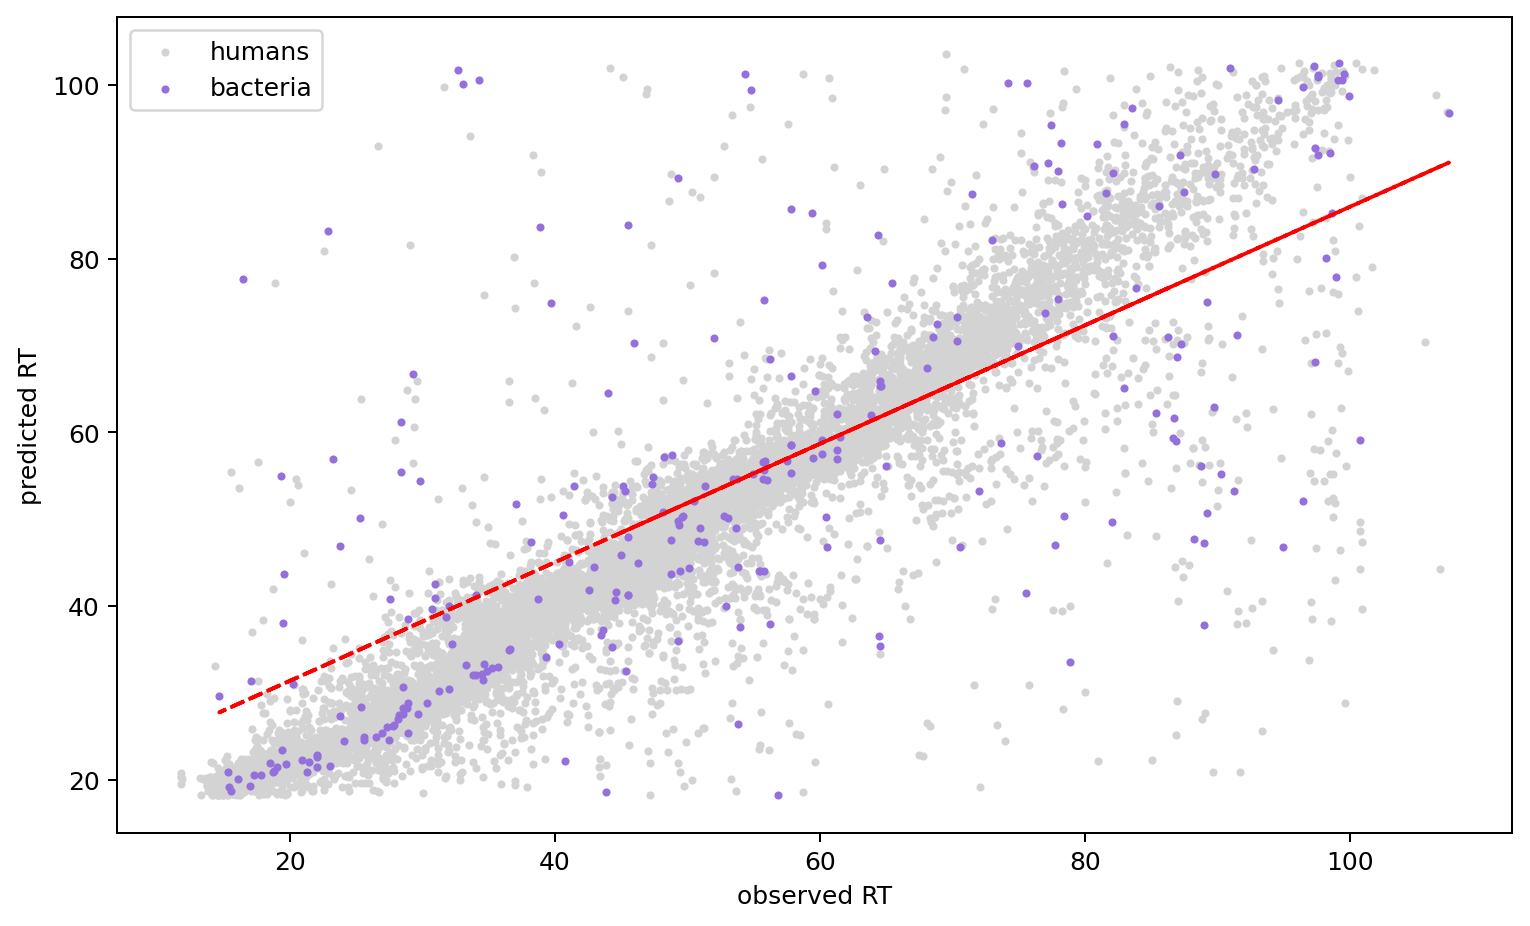

In [21]:
# plots predicted vs. observed RT for the different species

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# figure size
plt.figure(figsize=(10, 6), dpi=180)
 
# first data point
x1 = human_trs
y1 = human_preds

plt.scatter(x1, y1, c='lightgrey', label='humans', s=5)
 
# second data point
x2 = bac_trs
y2 = bac_preds
 

plt.scatter(x2, y2, c='mediumpurple', label='bacteria', s=5)


# trendline
z = np.polyfit(x3, y3, 1)
p = np.poly1d(z)
plt.plot(x3,p(x3),"r--")


# labels
plt.xlabel("observed RT")
plt.ylabel("predicted RT")
plt.legend(loc="upper left")


 
# depict illustration
plt.show()

